In [53]:
!pip install beautifulsoup4
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
#NBA season we are working with
year = 2020
#Start of Advanced stats data
url = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"
html = urlopen(url)
soup = BeautifulSoup(html)
#Get all the column headers
soup.findAll('tr', limit=2)
#Extract what we need and put it in a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
#Exclude first column which we do not need
headers = headers[1:]
headers
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
#Start of Contract Data
url_2 = "https://www.basketball-reference.com/contracts/players.html"
html_2 = urlopen(url_2)
soup_2 = BeautifulSoup(html_2)
#Get all the column headers
soup_2.findAll('tr', limit=2)
#Extract what we need and put it in a list
headers_2 = [th.getText() for th in soup_2.findAll('tr', limit=2)[1].findAll('th')]
#Exclude first column which we do not need
headers_2 = headers_2[1:]
headers_2
rows_2 = soup_2.findAll('tr')[1:]
player_stats_2 = [[td.getText() for td in rows_2[i].findAll('td')] for i in range(len(rows_2))]
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)
stats_2 = pd.DataFrame(player_stats_2, columns = headers_2)
stats_2.head(10)
while True:
    player = input("Please enter an NBA player or enter quit to exit: ")
    if player == "quit":
        break
    else:
        player_WS = stats['WS'][stats['Player'] == player]
        print(player_WS)
        player_salary = stats_2['2019-20'][stats_2['Player'] == player]
        print(player_salary)


Please enter an NBA player or enter quit to exit: Steven Adams
0    1.6
Name: WS, dtype: object
45    $25,842,697
Name: 2019-20, dtype: object
Please enter an NBA player or enter quit to exit: James Harden
185    4.6
Name: WS, dtype: object
5    $37,800,000
Name: 2019-20, dtype: object
Please enter an NBA player or enter quit to exit: Stephen Curry
113    0.2
Name: WS, dtype: object
1    $40,231,758
Name: 2019-20, dtype: object
Please enter an NBA player or enter quit to exit: quit


In [1]:
#url_2 = "https://www.basketball-reference.com/contracts/players.html"
#html_2 = urlopen(url_2)
#soup_2 = BeautifulSoup(html_2)
#Get all the column headers
#soup_2.findAll('tr', limit=2)
#Extract what we need and put it in a list
#headers_2 = [th.getText() for th in soup_2.findAll('tr', limit=2)[1].findAll('th')]
#Exclude first column which we do not need
#headers_2 = headers_2[1:]
#headers_2
#rows_2 = soup_2.findAll('tr')[1:]
#player_stats_2 = [[td.getText() for td in rows_2[i].findAll('td')] for i in range(len(rows_2))]


In [11]:
#Final version starts here!
def Getdata(website,number): 
    html = urlopen(website)
    soup = BeautifulSoup(html)
    soup.findAll('tr', limit=2)
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[number].findAll('th')]
    headers = headers[1:]
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
    return player_stats

def Getheader(website,number): 
    html = urlopen(website)
    soup = BeautifulSoup(html)
    soup.findAll('tr', limit=2)
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[number].findAll('th')]
    headers = headers[1:]
    return headers
def convert_to_number(x):
    if len(x) > 3:
        first_part = x[1:x.index(",")]
        rest = x[x.index(",")+1:]
        if len(rest)>3:
            second = rest[0:rest.index(',')]
            rest_2 = rest[rest.index(',')+1:]
            if len(rest_2)>3:
                third = rest_2[0:rest_2.index(',')]
                rest_3 = rest_2[rest_2.index(',')+1:]
            else:
                number = (first_part+second+rest_2)
        else:
            number = (first_part + rest)
    else:
        number = (x[1:])
    return round(float(number),2)
def finddata(lists,variable,newkey):
    for i in lists:
        if i['Name'] == player:
            variable = (i[newkey])
    return variable

In [12]:
!pip install beautifulsoup4
!pip install chart-studio
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib

In [7]:
url = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"
url_2 = "https://www.basketball-reference.com/contracts/players.html"
player_stats = Getdata(url,0)
player_contract = Getdata(url_2,1)
n = []

while n in player_stats:
    player_stats.remove(n)    
while n in player_contract:
    player_contract.remove(n)
stats = pd.DataFrame(player_stats, columns = Getheader(url,0))
stats_contract = pd.DataFrame(player_contract, columns = Getheader(url_2,1))
listdata = []
for i in player_stats:
    dictionary = {}
    dictionary['Name'] = i[0]
    dictionary['Game'] = float(i[4])
    dictionary['WS'] = float(i[21])
    dictionary['FairSalary'] = round(float(i[21])/float(i[4])*82*3064988.52,2)
    listdata.append(dictionary)
listdata_2 = []
for i in player_contract:
    dictionary = {}
    dictionary['Name'] = i[0]
    money = i[2]
    dictionary['2019-20'] = convert_to_number(money)
    listdata_2.append(dictionary)
while True:
    player = input("Please enter an NBA player or enter quit to exit: ")
    if player == "quit":
        break
    else: 
        try:
            
            fairsalary = finddata(listdata,'salary','FairSalary')
            for i in listdata:
                if i['Name'] == player:
                    winshare = (i['WS'])
            for j in listdata_2:
                if j['Name'] == player:
                    contract = j['2019-20'] 
            if contract > fairsalary:
                print("%s's contract is $%.2f, and he actually should be paid for $%.2f" %(player,contract,fairsalary))
                print('He is overpaid!')
            if contract == fairsalary:
                print("%s's contract is $%.2f, and he actually should be paid for $%.2f" %(player,contract,fairsalary))
                print('Fair Deal!')
            if contract < fairsalary:
                print("%s's contract is $%.2f, and he actually should be paid for $%.2f" %(player,contract,fairsalary))
                print('Pay him more!')
        except:
            print("There is not such player, or he didn't play this season")
            

    

Please enter an NBA player or enter quit to exit: Kevin Durant
There is not such player, or he didn't play this season
Please enter an NBA player or enter quit to exit: quit


In [8]:
newtable = pd.DataFrame(listdata_2)
newtable_2 = pd.DataFrame(listdata)
newlist = []
for i in listdata:
    dic={}
    dic['Name'] = i['Name']
    dic['FairSalary'] = i['FairSalary']
    for j in listdata_2:
        if i['Name']==j['Name']:
            dic['2019-20'] = j['2019-20']
    newlist.append(dic)

table = pd.DataFrame(newlist) 
table['Excess value'] = table['FairSalary'] - table['2019-20']
table_1 = table.dropna()
table_noNA = table_1.sort_values('Excess value')
overpaid = table_noNA.head(10)
underpaid = table_noNA.tail(10)
display(overpaid)
display(underpaid)

,Name,FairSalary,2019-20,Excess value
173,Blake Griffin,5799901.35,34234964.0,-28435062.65
108,Stephen Curry,12566452.93,40231758.0,-27665305.07
351,Chandler Parsons,0.00,25102511.0,-25102511.00
425,Evan Turner,-5026581.17,18606557.0,-23633138.17
445,Russell Westbrook,14851262.56,38178000.0,-23326737.44
98,Mike Conley,9574440.33,32511623.0,-22937182.67
163,Eric Gordon,-8377635.29,14057730.0,-22435365.29
28,Nicolas Batum,3590415.12,25565217.0,-21974801.88
20,Marvin Bagley,-12566452.93,8556120.0,-21122572.93
387,D'Angelo Russell,8976037.81,27285000.0,-18308962.19


,Name,FairSalary,2019-20,Excess value
399,Pascal Siakam,25132905.86,2351839.0,22781066.86
110,Anthony Davis,52360220.55,27093019.0,25267201.55
10,Giannis Antetokounmpo,51313016.14,25842697.0,25470319.14
181,Montrezl Harrell,32866107.67,6000000.0,26866107.67
388,Domantas Sabonis,30596581.05,3529555.0,27067026.05
198,George Hill,28411110.98,1000000.0,27411110.98
205,Richaun Holmes,33510541.15,4767000.0,28743541.15
5,Jarrett Allen,32463336.74,2376840.0,30086496.74
1,Bam Adebayo,34557745.56,3454080.0,31103665.56
121,Luka Dončić,52360220.55,7683360.0,44676860.55


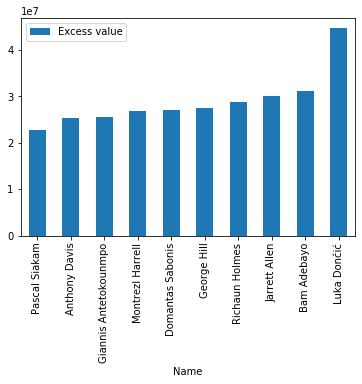

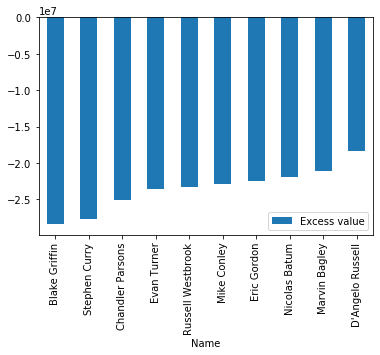

In [10]:
overpaid_top10 = overpaid[['Name','Excess value']]
underpaid_top10 = underpaid[['Name','Excess value']]
underpaid_top10.plot.bar(x='Name', y='Excess value', rot='vertical')
overpaid_top10.plot.bar(x='Name', y='Excess value', rot='vertical')
#The y axis is scaled such that 4 represents $40 million and -2 represents -$20 million and so on